In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [52]:
data_path = 'data_az/'

landscape_hold_table = 'landscape_hold_table2-2023-03-01_00-17-35/'
landscape_hold_lap = 'landscape_hold_lap-2023-03-01_00-20-38/'
tap_portrait_table = 'tap_portrait_table-2023-03-01_01-26-01/'
scroll_lap = 'scroll_lap2-2023-03-01_01-03-11/'
swipe_lr_lap = 'swipe_lr_lap-2023-03-01_01-05-52/'

In [54]:
acc_filename = 'AccelerometerUncalibrated.csv'
landscape_hold_lap_acc = data_path + landscape_hold_lap + acc_filename
tap_portrait_table_acc = data_path + tap_portrait_table + acc_filename
scroll_lap_acc = data_path + scroll_lap + acc_filename
swipe_lr_lap_acc = data_path + swipe_lr_lap + acc_filename

In [55]:
dict_types = {'time':'float', 'dt':'float', 'x':'float', 'y':'float', 'z':'float'}
lhl_df = pd.read_csv(landscape_hold_lap_acc, names=['time', 'dt', 'z', 'y', 'x'], skiprows=[0], header=None, dtype = dict_types)
tpt_df = pd.read_csv(tap_portrait_table_acc, names=['time', 'dt', 'z', 'y', 'x'], skiprows=[0], header=None, dtype = dict_types)
sl_df = pd.read_csv(scroll_lap_acc, names=['time', 'dt', 'z', 'y', 'x'], skiprows=[0], header=None, dtype = dict_types)
slr_df = pd.read_csv(swipe_lr_lap_acc, names=['time', 'dt', 'z', 'y', 'x'], skiprows=[0], header=None, dtype = dict_types)


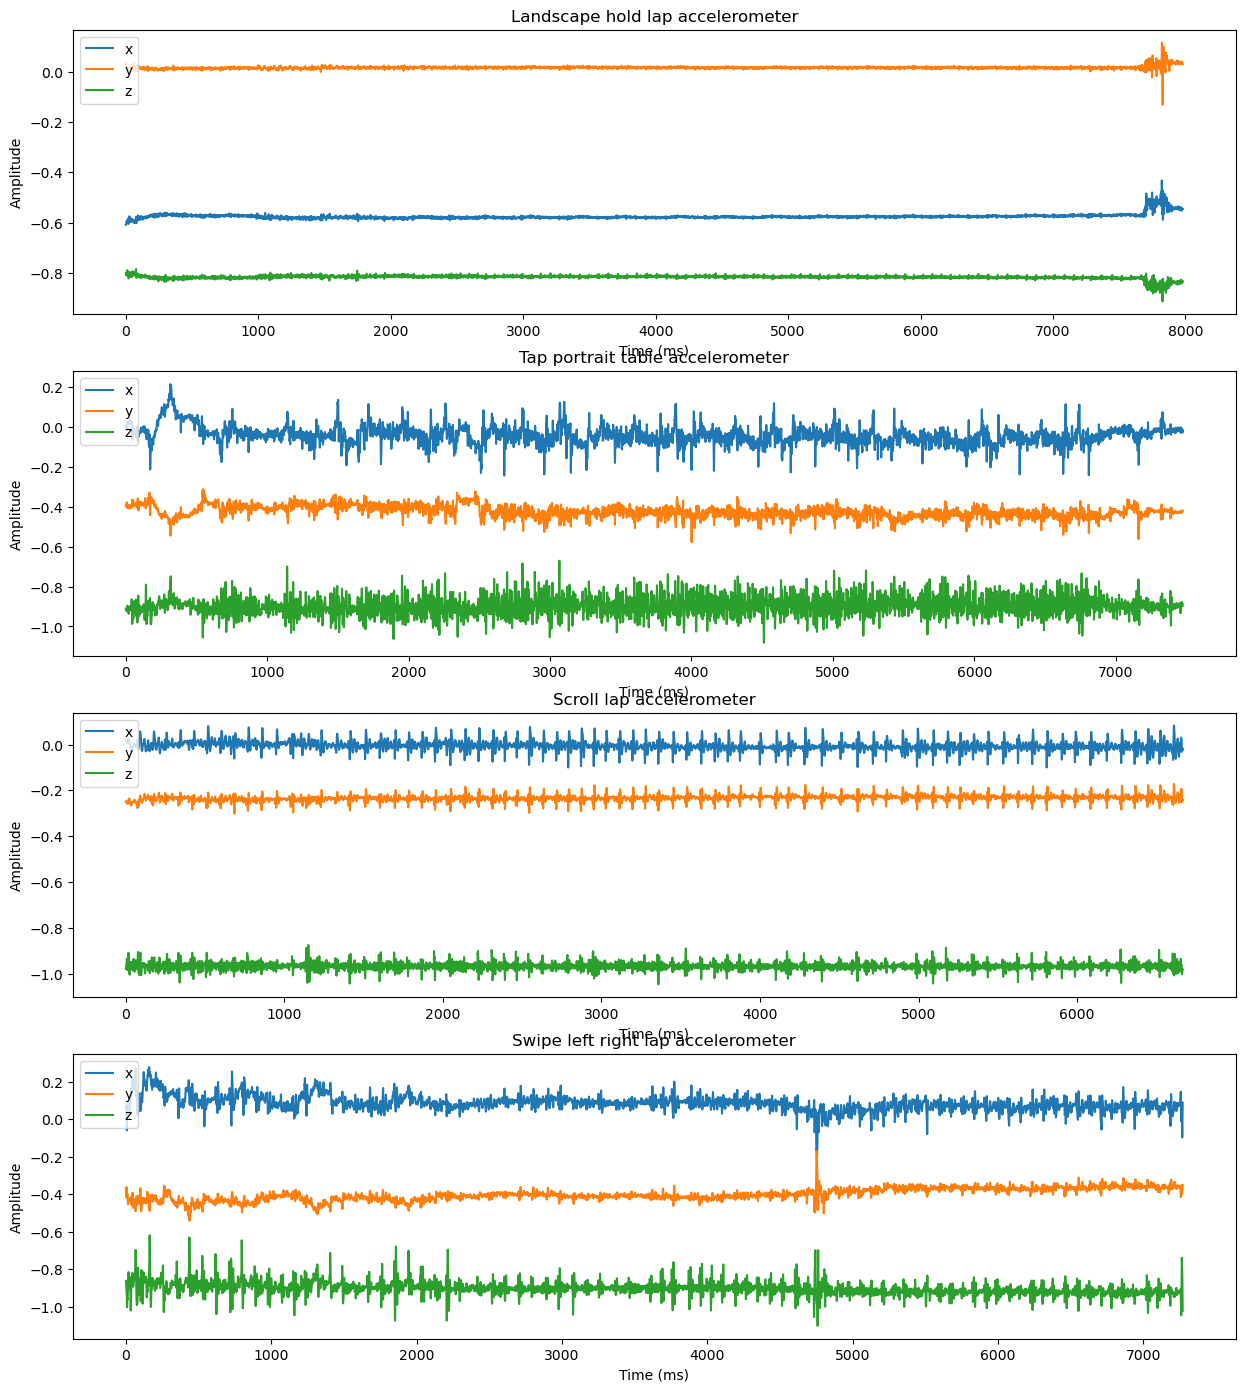

In [64]:
%matplotlib inline

plt.figure(figsize=(15, 17))
ax = plt.subplot(4, 1, 1)
plt.plot(lhl_df['x'], label='x')
plt.plot(lhl_df['y'], label='y')
plt.plot(lhl_df['z'], label='z')
plt.legend(loc="upper left")
plt.title("Landscape hold lap accelerometer")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")

plt.subplot(4, 1, 2)
plt.plot(tpt_df['x'], label='x')
plt.plot(tpt_df['y'], label='y')
plt.plot(tpt_df['z'], label='z')
plt.legend(loc="upper left")
plt.title("Tap portrait table accelerometer")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")

plt.subplot(4, 1, 3)
plt.plot(sl_df['x'], label='x')
plt.plot(sl_df['y'], label='y')
plt.plot(sl_df['z'], label='z')
plt.legend(loc="upper left")
plt.title("Scroll lap accelerometer")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")

plt.subplot(4, 1, 4)
plt.plot(slr_df['x'], label='x')
plt.plot(slr_df['y'], label='y')
plt.plot(slr_df['z'], label='z')
plt.legend(loc="upper left")
plt.title("Swipe left right lap accelerometer")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.tight_layout
plt.show()


In [ ]:
landscape_hold_table_audio = data_path + landscape_hold_table + 'Microphone.caf'
landscape_hold_lap_audio = data_path + landscape_hold_lap + 'Microphone.caf'
tap_portrait_table_audio = data_path + tap_portrait_table + 'Microphone.caf'
scroll_lap_audio = data_path + scroll_lap + 'Microphone.caf'
sr=8000
lht, _ = librosa.load(landscape_hold_table_audio, sr=sr)
lhl, _ = librosa.load(landscape_hold_lap_audio, sr=sr)
tpt, _ = librosa.load(tap_portrait_table_audio, sr=sr)
sl, _ = librosa.load(scroll_lap_audio, sr=sr)

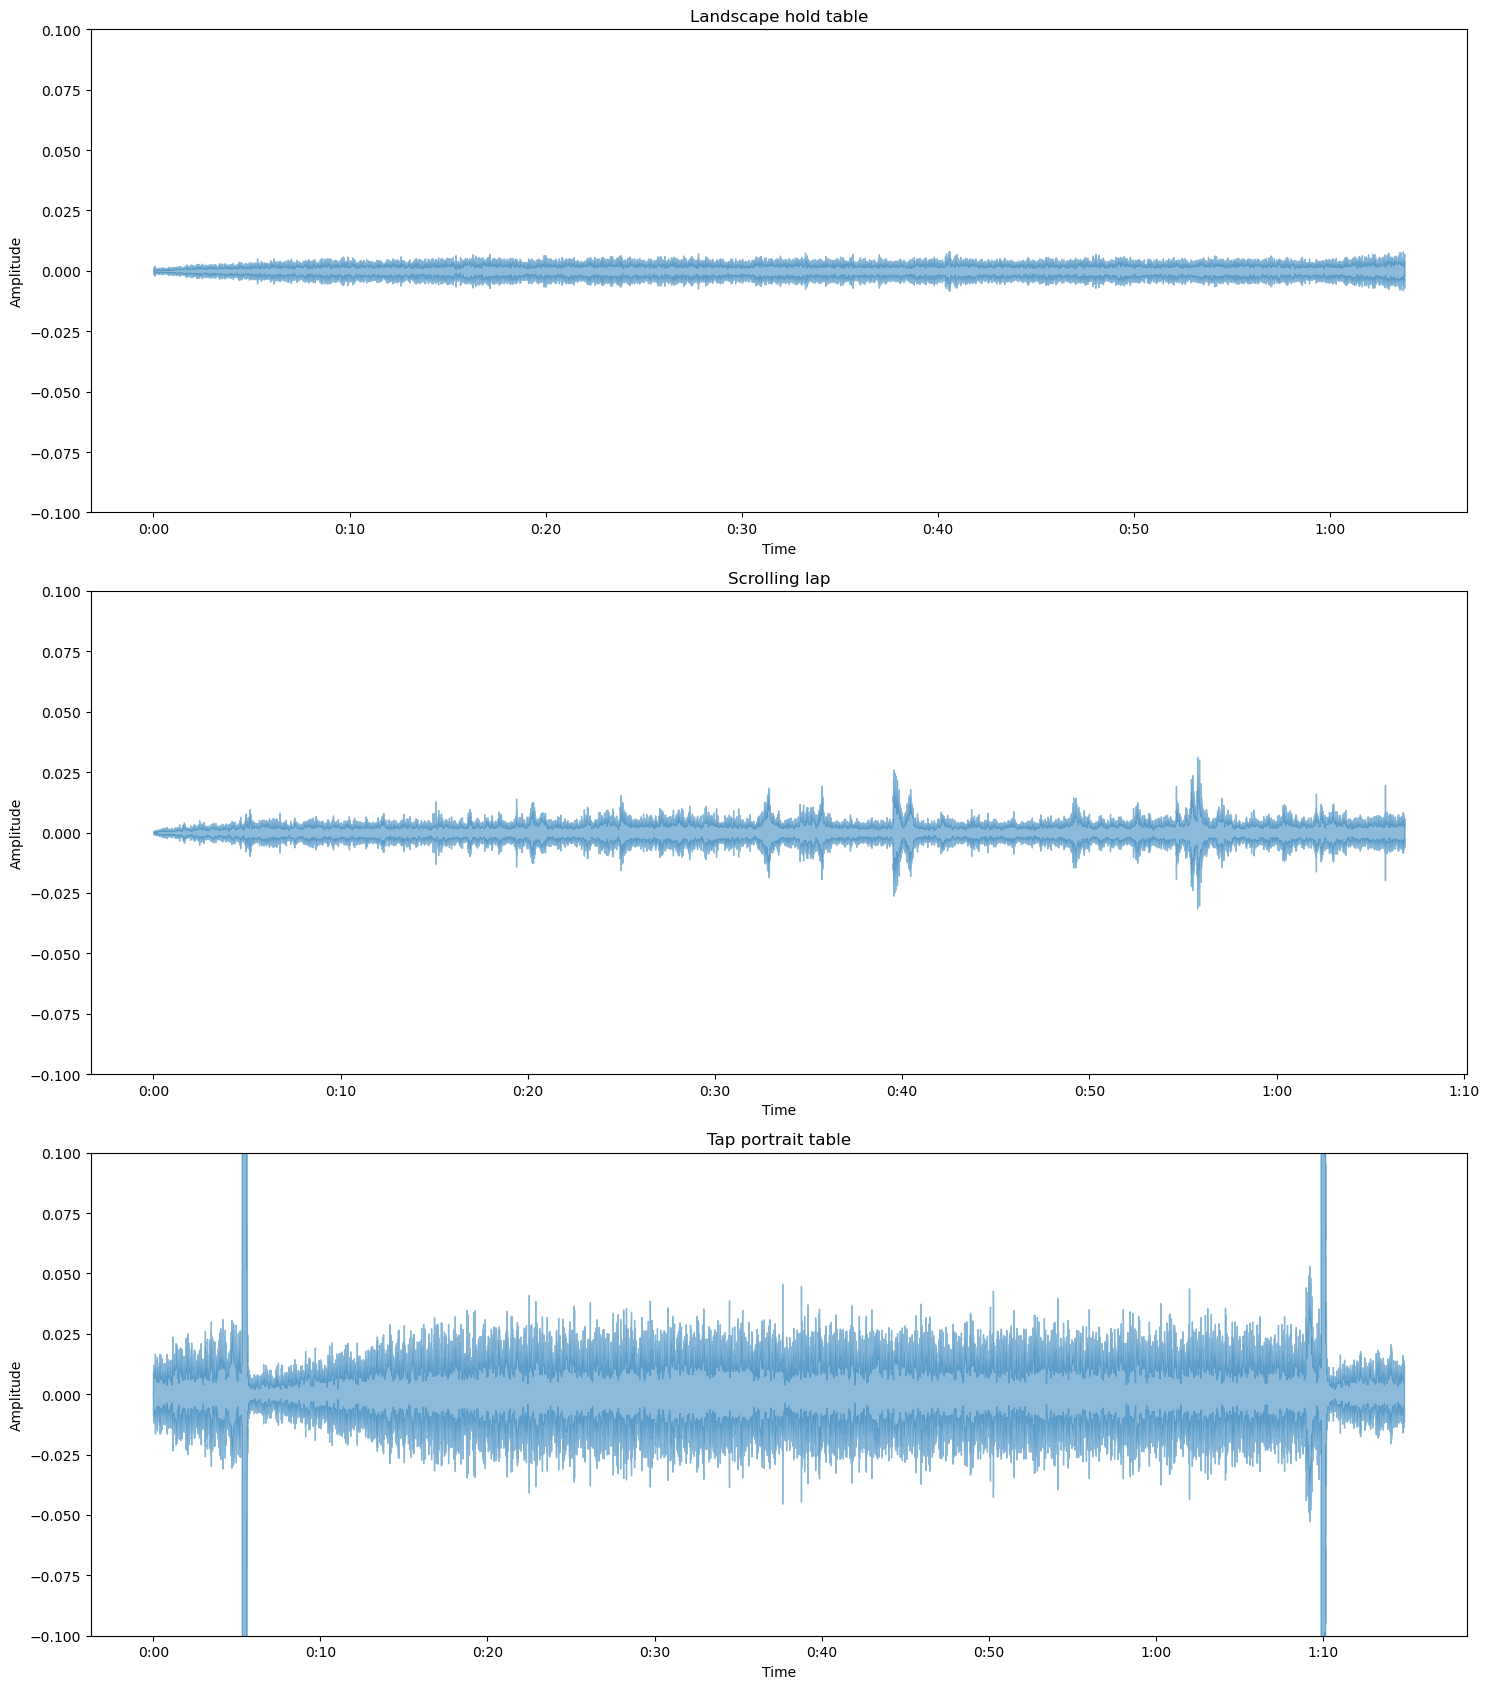

In [51]:
y_low = -0.1
y_high = 0.1
plt.figure(figsize=(15, 17))
ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(lht, alpha=0.5, sr=sr)
plt.ylim((-1, 1))
plt.title("Landscape hold table")
plt.ylabel("Amplitude")
plt.ylim((y_low, y_high))

plt.subplot(3, 1, 2)
librosa.display.waveshow(sl, alpha=0.5, sr=sr)
plt.title("Scrolling lap")
plt.ylabel("Amplitude")
plt.ylim((y_low, y_high))

plt.subplot(3, 1, 3)
librosa.display.waveshow(tpt, alpha=0.5, sr=sr)
plt.title("Tap portrait table")
plt.ylabel("Amplitude")
plt.ylim((y_low, y_high))

plt.suptitle('Raw audio example plots')
plt.tight_layout()
plt.show()

In [49]:
HOP_LENGTH = 256
FRAME_SIZE=512

t_lht = librosa.frames_to_time(range(math.ceil(len(lht)/HOP_LENGTH)), hop_length=HOP_LENGTH, sr=sr)
t_lhl = librosa.frames_to_time(range(math.ceil(len(lhl)/HOP_LENGTH)), hop_length=HOP_LENGTH, sr=sr)
t_tpt = librosa.frames_to_time(range(math.ceil(len(tpt)/HOP_LENGTH)), hop_length=HOP_LENGTH, sr=sr)
t_scl = librosa.frames_to_time(range(math.ceil(len(sl)/HOP_LENGTH)), hop_length=HOP_LENGTH, sr=sr)



Text(0.5, 1.0, 'Zero crossing rate (ZCR)')

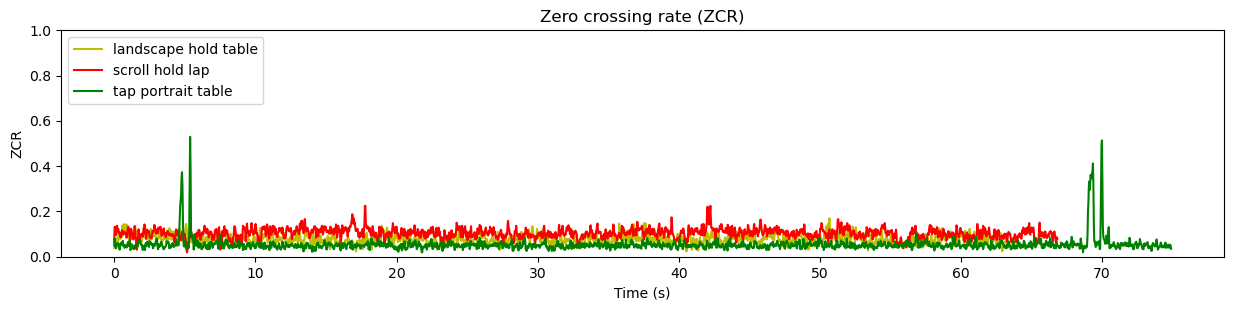

In [50]:
plt.figure(figsize=(15, 10))


ax = plt.subplot(3, 1, 1)
plt.plot(t_lht, librosa.feature.zero_crossing_rate(lht, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0], color="y", label="landscape hold table")
plt.plot(t_scl, librosa.feature.zero_crossing_rate(sl, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0], color="r", label="scroll hold lap")
plt.plot(t_tpt, librosa.feature.zero_crossing_rate(tpt, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0], color="g", label="tap portrait table")
plt.ylim(0, 1)
plt.legend(loc="upper left")
plt.xlabel("Time (s)")
plt.ylabel("ZCR")
plt.title("Zero crossing rate (ZCR)")